# <center> Energy Usage Prediction </center>

### Group - 17

C21102950<br>
C21078806<br>
C21034767<br>
C21094933<br>
C2081161<br>
C21111600<br>
C21093270<br>
C21074456<br>

Supervisor: Hanzhi Wang

#### About the dataset:

Assessing the value of energy efficiency improvements can be challenging as there's no way to truly know how much energy a building would have used without the improvements. The best we can do is to build counterfactual models. Once a building is overhauled the new (lower) energy consumption is compared against modeled values for the original building to calculate the savings from the retrofit. More accurate models could support better market incentives and enable lower cost financing.
The dataset includes three years of hourly meter readings from over one thousand buildings at several different sites around the world.



#### Objective: 

To develop a machine learning model to predict energy usage based on historic usage rates and observed weather.

In [8]:
# importing required modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as datetime

# !pip install seaborn --upgrade

random = 51

## Task - 1
### Descriptive Analysis of the Dataset + Error Analysis

### Data Overview

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
weather_train= pd.read_csv('weather_train.csv')
weather_test = pd.read_csv('weather_test.csv')
building_metadata= pd.read_csv('building_metadata.csv')

In [4]:
building_metadata

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [5]:
building_metadata.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [6]:
building_metadata.isnull().any()


site_id        False
building_id    False
primary_use    False
square_feet    False
year_built      True
floor_count     True
dtype: bool

In [7]:
weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [8]:
weather_train.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


In [9]:
weather_train.isnull().any()

site_id               False
timestamp             False
air_temperature        True
cloud_coverage         True
dew_temperature        True
precip_depth_1_hr      True
sea_level_pressure     True
wind_direction         True
wind_speed             True
dtype: bool

### Histogram

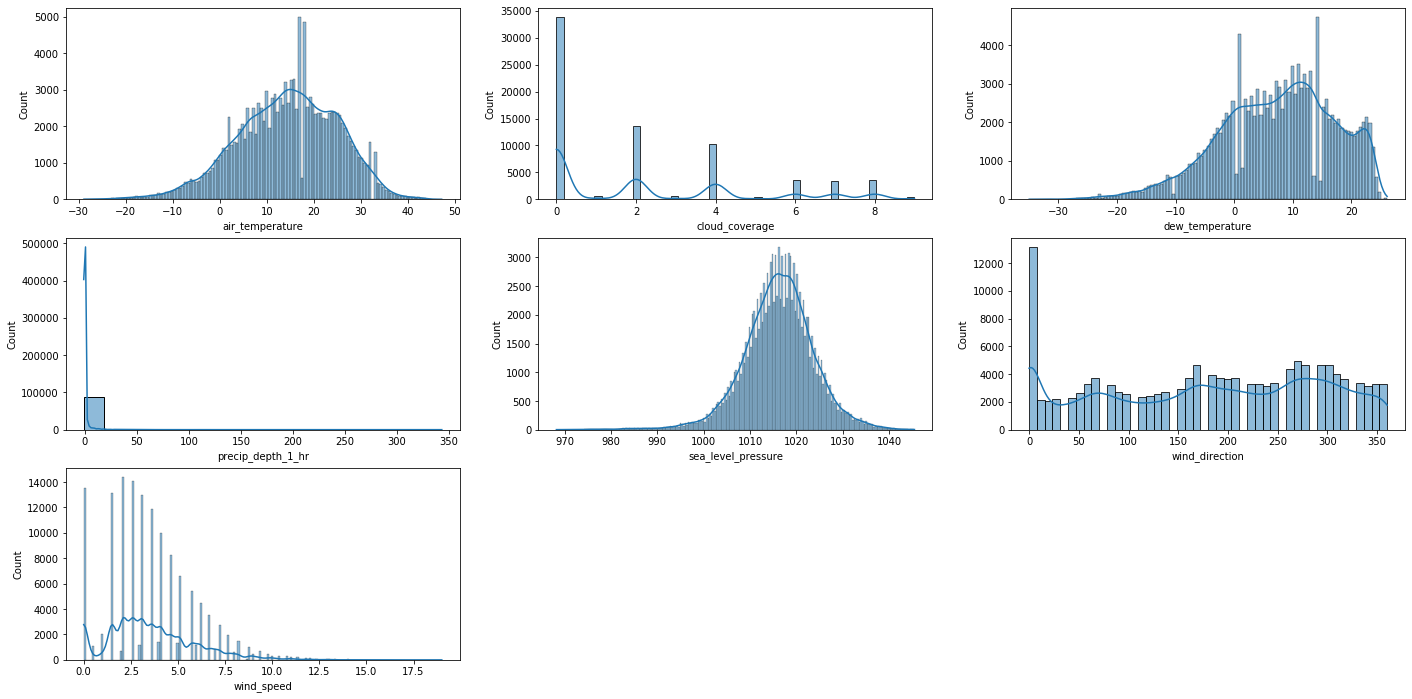

In [10]:
plt.figure(figsize=(24,12))
plt.subplot(3,3,1)
sns.histplot(weather_train["air_temperature"],kde=True)
plt.subplot(3,3,2)
sns.histplot(weather_train["cloud_coverage"],kde=True)
plt.subplot(3,3,3)
sns.histplot(weather_train["dew_temperature"],kde=True)
plt.subplot(3,3,4)
sns.histplot(weather_train["precip_depth_1_hr"],kde=True)
plt.subplot(3,3,5)
sns.histplot(weather_train["sea_level_pressure"],kde=True)
plt.subplot(3,3,6)
sns.histplot(weather_train["wind_direction"],kde=True)
plt.subplot(3,3,7)
sns.histplot(weather_train["wind_speed"],kde=True)

### Box diagram

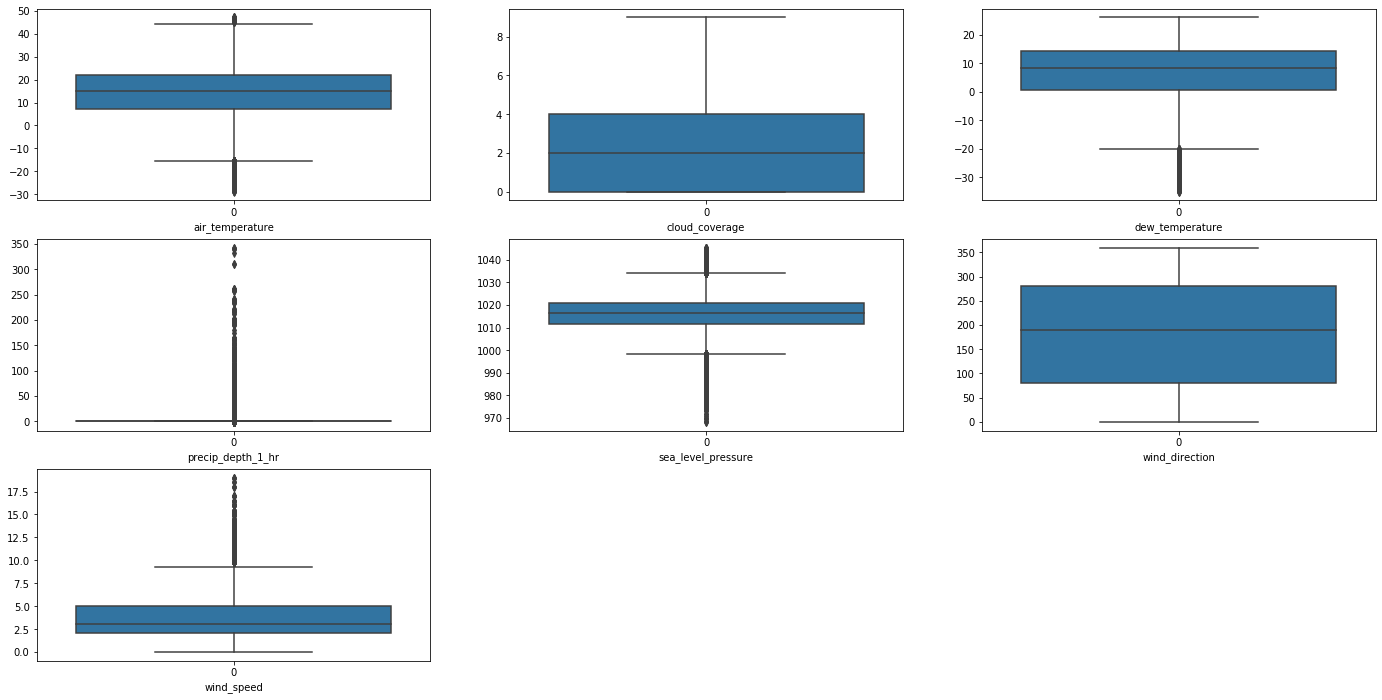

In [11]:
plt.figure(figsize=(24,12))
plt.subplot(3,3,1)
plt.xlabel('air_temperature')
sns.boxplot(data=weather_train["air_temperature"])
plt.subplot(3,3,2)
plt.xlabel('cloud_coverage')
sns.boxplot(data=weather_train["cloud_coverage"])
plt.subplot(3,3,3)
plt.xlabel('dew_temperature')
sns.boxplot(data=weather_train["dew_temperature"])
plt.subplot(3,3,4)
plt.xlabel('precip_depth_1_hr')
sns.boxplot(data=weather_train["precip_depth_1_hr"])
plt.subplot(3,3,5)
plt.xlabel('sea_level_pressure')
sns.boxplot(data=weather_train["sea_level_pressure"])
plt.subplot(3,3,6)
plt.xlabel('wind_direction')
sns.boxplot(data=weather_train["wind_direction"])
plt.subplot(3,3,7)
plt.xlabel('wind_speed')
sns.boxplot(data=weather_train["wind_speed"])

### Probability diagram

In [12]:
weather_train["cloud_coverage"].value_counts()

0.0    33871
2.0    13585
4.0    10241
8.0     3531
6.0     3521
7.0     3485
1.0      713
3.0      608
5.0      526
9.0      519
Name: cloud_coverage, dtype: int64

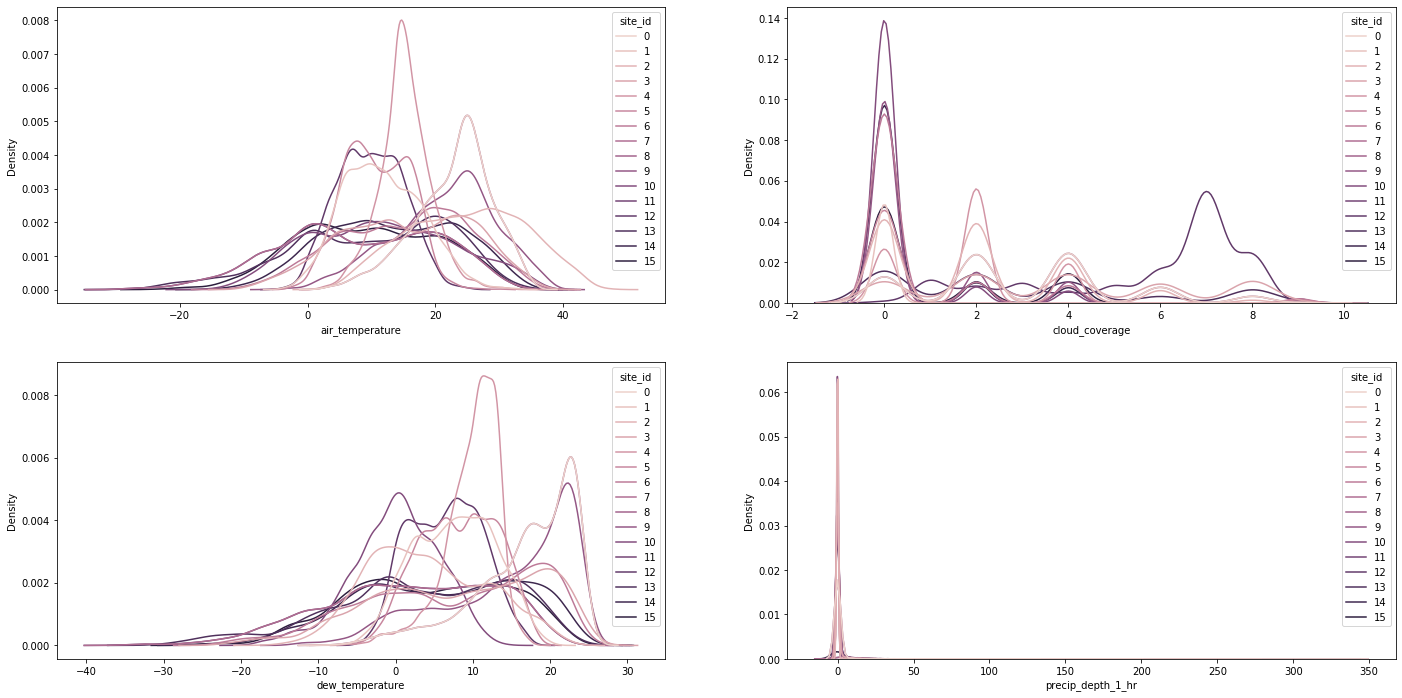

In [13]:
plt.figure(figsize=(24,12))
plt.subplot(2,2,1)
sns.kdeplot(data=weather_train, x="air_temperature", hue="site_id",warn_singular=False)
plt.subplot(2,2,2)
sns.kdeplot(data=weather_train, x="cloud_coverage", hue="site_id",warn_singular=False)
plt.subplot(2,2,3)
sns.kdeplot(data=weather_train, x="dew_temperature", hue="site_id",warn_singular=False)
plt.subplot(2,2,4)
sns.kdeplot(data=weather_train, x="precip_depth_1_hr", hue="site_id",warn_singular=False)

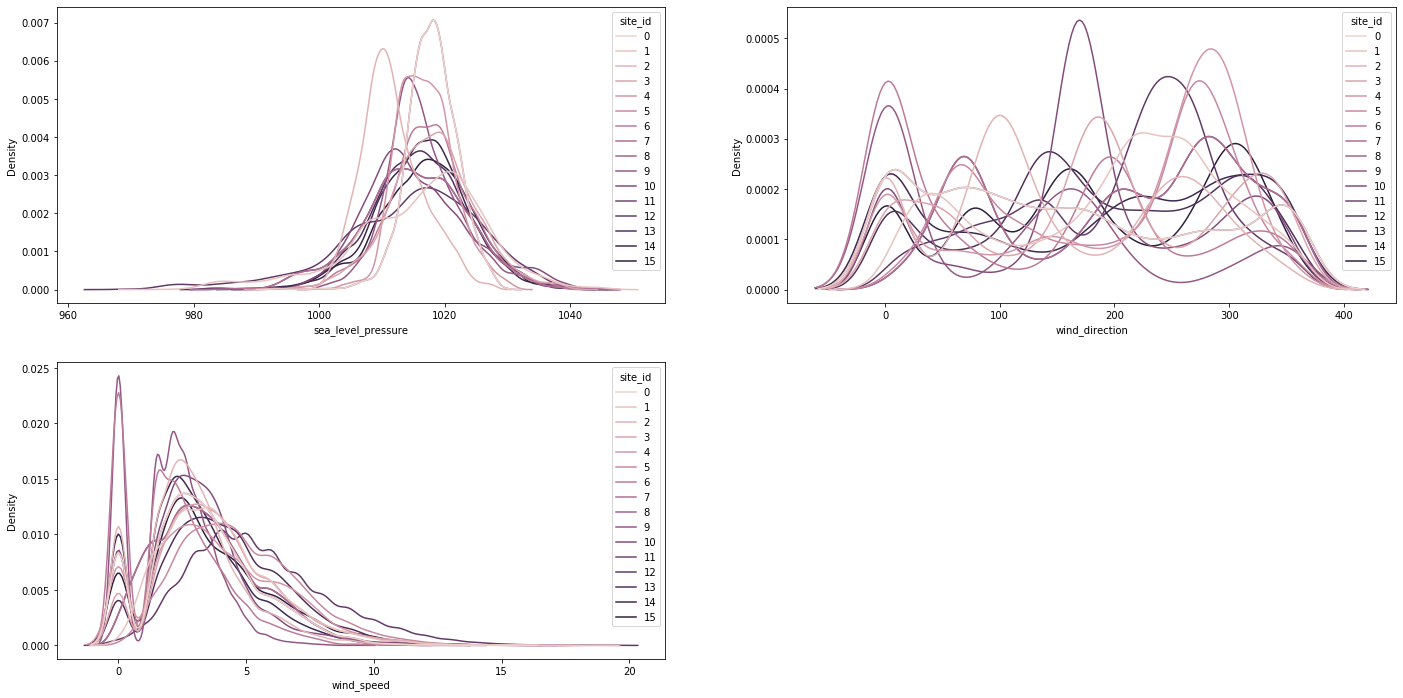

In [14]:
plt.figure(figsize=(24,12))
plt.subplot(2,2,1)
sns.kdeplot(data=weather_train, x="sea_level_pressure", hue="site_id",warn_singular=False)
plt.subplot(2,2,2)
sns.kdeplot(data=weather_train, x="wind_direction", hue="site_id",warn_singular=False)
plt.subplot(2,2,3)
sns.kdeplot(data=weather_train, x="wind_speed", hue="site_id",warn_singular=False)

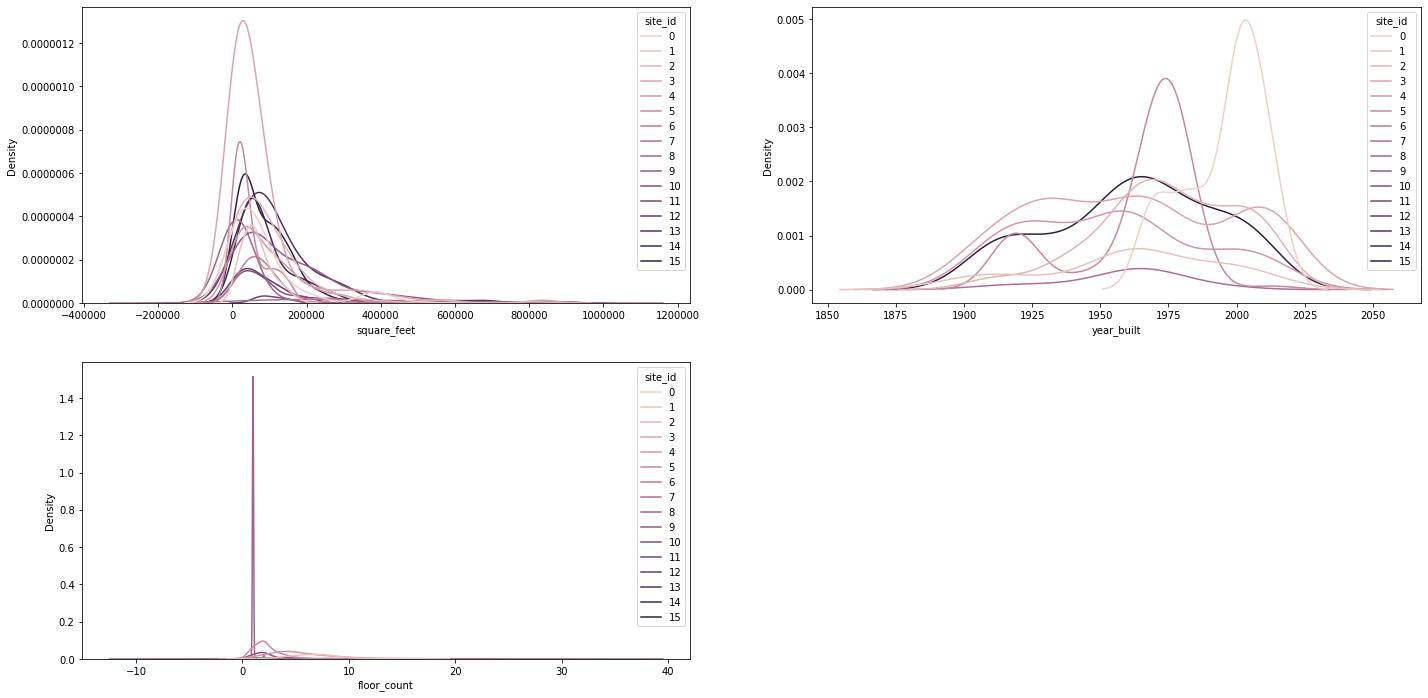

In [15]:
plt.figure(figsize=(24,12))
plt.subplot(2,2,1)
sns.kdeplot(data=building_metadata, x="square_feet", hue="site_id",warn_singular=False)
plt.subplot(2,2,2)
sns.kdeplot(data=building_metadata, x="year_built", hue="site_id",warn_singular=False)
plt.subplot(2,2,3)
sns.kdeplot(data=building_metadata, x="floor_count", hue="site_id",warn_singular=False)

In [16]:
print(building_metadata)
print(train)

      site_id  building_id                    primary_use  square_feet  \
0           0            0                      Education         7432   
1           0            1                      Education         2720   
2           0            2                      Education         5376   
3           0            3                      Education        23685   
4           0            4                      Education       116607   
...       ...          ...                            ...          ...   
1444       15         1444  Entertainment/public assembly        19619   
1445       15         1445                      Education         4298   
1446       15         1446  Entertainment/public assembly        11265   
1447       15         1447            Lodging/residential        29775   
1448       15         1448                         Office        92271   

      year_built  floor_count  
0         2008.0          NaN  
1         2004.0          NaN  
2         1991.

In [17]:
primary_use_Unique = building_metadata['primary_use'].nunique()
print('Number of unique values in column "primary_use" of the building_meta : ')
print(primary_use_Unique)

primary_use_num_of_elements = building_metadata['primary_use'].unique()
print('Unique element in column "primary_use" of the building_meta : ')
print(primary_use_num_of_elements)

Number of unique values in column "primary_use" of the building_meta : 
16
Unique element in column "primary_use" of the building_meta : 
['Education' 'Lodging/residential' 'Office'
 'Entertainment/public assembly' 'Other' 'Retail' 'Parking'
 'Public services' 'Warehouse/storage' 'Food sales and service'
 'Religious worship' 'Healthcare' 'Utility' 'Technology/science'
 'Manufacturing/industrial' 'Services']


In [18]:
print('Columns of the building dataset is', building_metadata.columns)

Columns of the building dataset is Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count'],
      dtype='object')


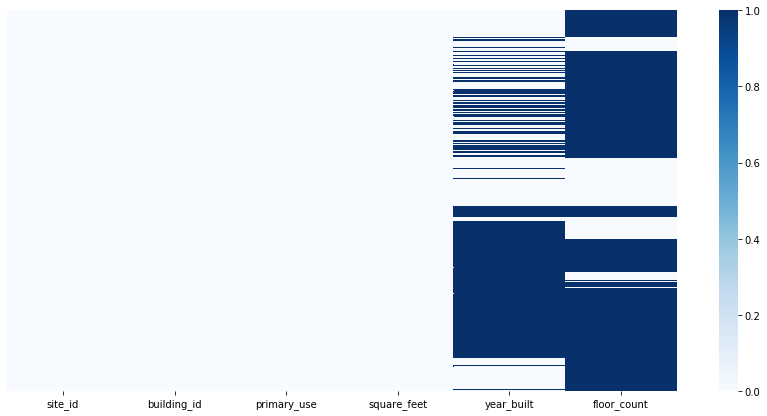

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(building_metadata.isnull(), yticklabels=False,cmap='Blues')

In [20]:
print("Percentage of missing values in the building_meta dataset")
building_meta_perc = building_metadata.isna().sum()/len(building_metadata)*100        #buliding_metadata.isna() -- detecting missing values in the given dataset 
print(building_meta_perc)

Percentage of missing values in the building_meta dataset
site_id         0.000000
building_id     0.000000
primary_use     0.000000
square_feet     0.000000
year_built     53.416149
floor_count    75.500345
dtype: float64


In [21]:
#floor_count and year_built have lots of missing values.We can take primary_use as categorical value.
building_metadata.groupby('site_id').agg({"building_id":[min,max]})

building_id      
                min   max
site_id                  
0                 0   104
1               105   155
2               156   290
3               291   564
4               565   655
5               656   744
6               745   788
7               789   803
8               804   873
9               874   997
10              998  1027
11             1028  1032
12             1033  1068
13             1069  1222
14             1223  1324
15             1325  1448

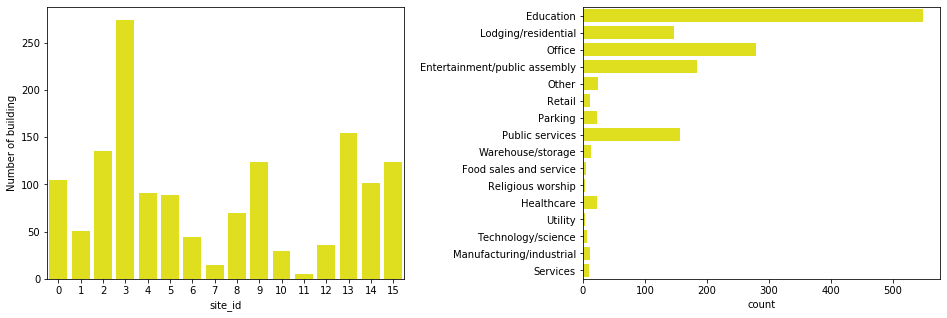

In [22]:
fig, axes = plt.subplots(1, 2,figsize=(16,5))
site_build = building_metadata.groupby('site_id').building_id.size()
sns.barplot(x=site_build.index , y= site_build,color="yellow",ax=axes[0])
axes[0].set_ylabel("Number of building")
sns.countplot(y="primary_use",data=building_metadata ,ax=axes[1],color="yellow")
fig.subplots_adjust(wspace=0.5)
plt.ylabel("")
del site_build

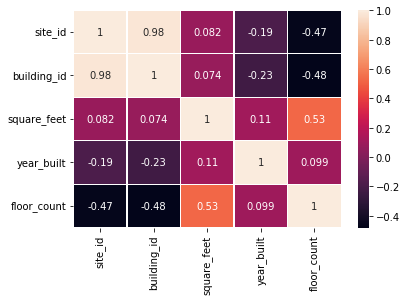

In [23]:
sns.heatmap(building_metadata.corr(),linewidths=.3,annot =True)

C:\Users\ammar\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ammar\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ammar\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

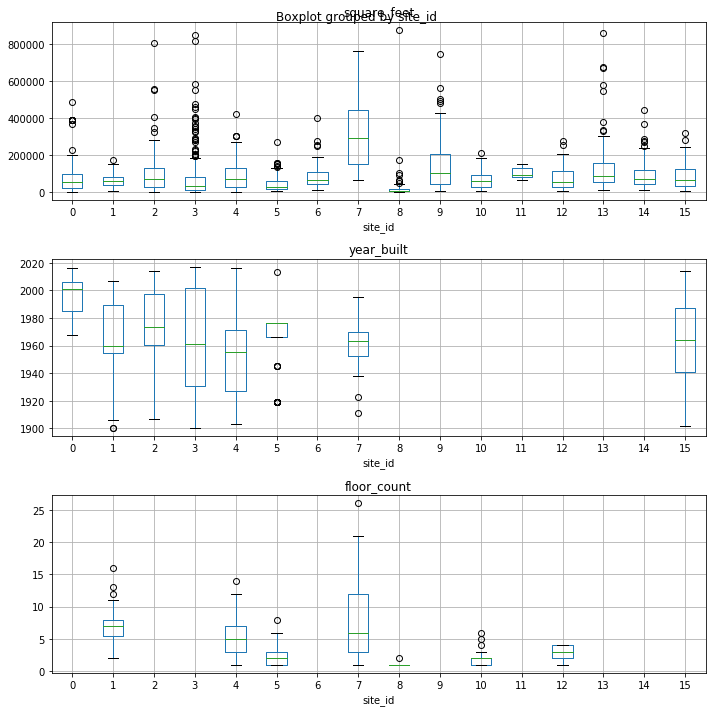

In [24]:
fig, axes = plt.subplots(3,1,figsize=(10,10)) 
columns = building_metadata.drop(["primary_use","site_id","building_id"],axis=1).columns
for i,col in enumerate(list(columns)):
    plot = building_metadata.boxplot(col, by="site_id", ax=axes.flatten()[i])

plt.tight_layout() 

plt.show()

In [25]:
print(train["timestamp"].min() , train["timestamp"].max(),sep ="\n")

2016-01-01 00:00:00
2016-12-31 23:00:00


In [26]:
# statistical details about meter_reading
train['meter_reading'].describe()

count    2.021610e+07
mean     2.117121e+03
std      1.532356e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

In [27]:
zeros = train[train['meter_reading']== 0].shape[0] / train.shape[0]
print('Zero reading percentile : {}'.format(round(zeros,3)))

Zero reading percentile : 0.093


In [28]:
#converting the meters to what they stand for 
train['meter'].replace({0:"electricity",1:"chilledwater",2:"steam",3:"hotwater"},inplace=True)

Text(0.5, 1.0, 'Meters percentage having zero readings')

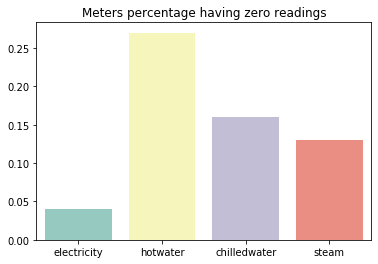

In [29]:
# to show the precentage of meters that having zeroes 
meter_dict = {}
for i in train["meter"].unique():
    percent = round(train[train['meter_reading']== 0]["meter"].value_counts()[i] /train["meter"].value_counts()[i],2)
    meter_dict[i] = percent
zero_meter = pd.Series(meter_dict)
sns.barplot(x=zero_meter.index, y= zero_meter,palette ="Set3")
plt.title("Meters percentage having zero readings")

Text(0.5, 1.0, 'For hot water')

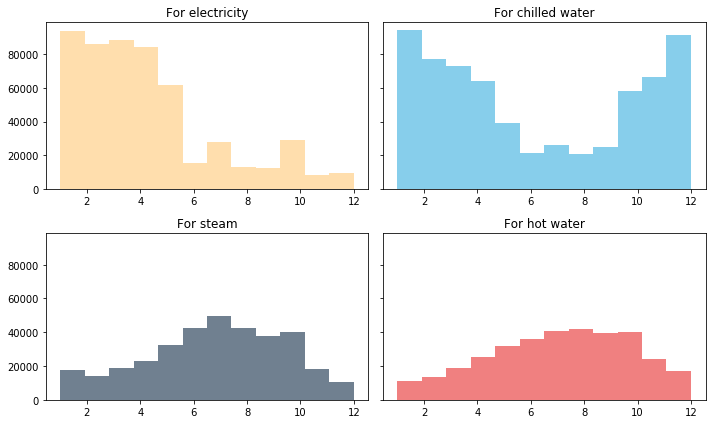

In [30]:
train["timestamp2"] = pd.to_datetime(train["timestamp"])
train["month"] = train.timestamp2.dt.month

fig, axs = plt.subplots(2,2, sharey=True, tight_layout=True,figsize=(10,6))

axs[0][0].hist(x ="month",data =train[(train.meter_reading == 0) & (train.meter=="electricity")],bins =12,color = "navajowhite")
axs[0][0].set_title("For electricity")

axs[0][1].hist(x ="month",data =train[(train.meter_reading == 0) & (train.meter=="chilledwater")],bins =12,color = "skyblue")
axs[0][1].set_title("For chilled water")

axs[1][0].hist(x ="month",data =train[(train.meter_reading == 0) & (train.meter=="steam")],bins =12,color = "slategrey")
axs[1][0].set_title("For steam")

axs[1][1].hist(x ="month",data =train[(train.meter_reading == 0) & (train.meter=="hotwater")],bins =12,color = "lightcoral")
axs[1][1].set_title("For hot water")

In [31]:
# Function for remove Outlier

def removeOutliers(data, outlierConstant = 1.5):
    values = np.array(data)
    upper_quartile = np.percentile(values, 75)
    lower_quartile = np.percentile(values, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartile = (lower_quartile - IQR, upper_quartile + IQR)
    results = []
    for i in values.tolist():
        if i >= quartile[0] and i <= quartile[1]:
            results.append(i)
    return results

In [32]:
target_noOutlier = removeOutliers(train.meter_reading)

C:\Users\ammar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ammar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ammar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

Text(0.5, 1.0, 'Target with Log Transform')

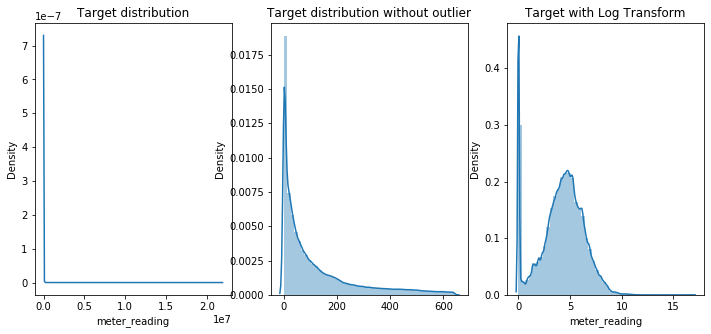

In [33]:
fig, axes = plt.subplots(1, 3,figsize=(12,5))

sns.distplot(train.meter_reading,hist = False,ax = axes[0])
axes[0].set_title("Target distribution")

sns.distplot(target_noOutlier,ax=axes[1])
axes[1].set_title("Target distribution without outlier")

sns.distplot(np.log1p(train.meter_reading),ax = axes[2])
axes[2].set_title("Target with Log Transform")

In [34]:
train['meter_reading_log'] = np.log1p(train['meter_reading'])

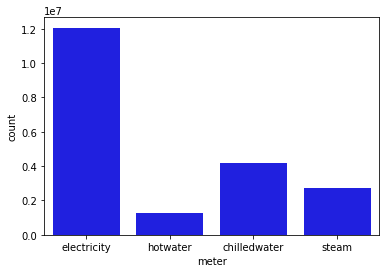

In [35]:
sns.countplot(x= "meter",data = train,color = 'b')

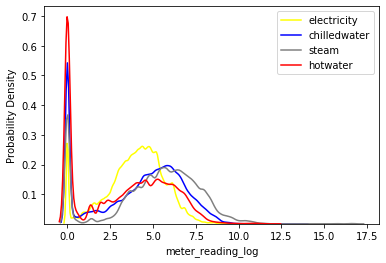

In [36]:
#Graphs shows distribution meter_reading in each meter category

sns.kdeplot(train.loc[(train['meter']=='electricity'), 
            "meter_reading_log"], color='yellow', shade=False, label='electricity')

sns.kdeplot(train.loc[(train['meter']=='chilledwater'), 
            "meter_reading_log"], color='b', shade=False, label='chilledwater')

sns.kdeplot(train.loc[(train['meter']=='steam'), 
            "meter_reading_log"], color='gray', shade=False, label='steam')

sns.kdeplot(train.loc[(train['meter']=='hotwater'), 
            "meter_reading_log"], color='r', shade=False, label='hotwater')

plt.xlabel('meter_reading_log') 
plt.ylabel('Probability Density')
plt.legend()


## Task - 2
### Data Preprocessing

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
weather_train= pd.read_csv('weather_train.csv')
weather_test = pd.read_csv('weather_test.csv')
building= pd.read_csv('building_metadata.csv')

### Merging the dataset:

In [4]:
print(train.shape)
print(weather_train.shape)
print(building.shape)

(20216100, 4)
(139773, 9)
(1449, 6)


In [5]:
# Using left join with train and test as base since they contain the larger part of the data. 
df_train= train.merge(building, on='building_id', how='left')
df_test= test.merge(building, on='building_id', how='left')
df_train=df_train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
df_test=df_test.merge(weather_test, on=['site_id', 'timestamp'], how='left')

### Breaking the timestamp feature:

In [6]:
# Splitting the timestamp feature into multiple units to create more variation.  
def break_datetime(df):
  df['timestamp']= pd.to_datetime(df['timestamp'])
  df['hour']= np.uint8(df['timestamp'].dt.hour)
  df['day_week']= np.uint8(df['timestamp'].dt.dayofweek)
  df['month']= np.uint8(df['timestamp'].dt.month)
  df['day_year']= np.uint16(df['timestamp'].dt.dayofyear)
  df['day']= np.uint16(df['timestamp'].dt.day)
  df['year']= np.uint16(df['timestamp'].dt.year)
  return df

In [9]:
df_train= break_datetime(df_train)
df_test= break_datetime(df_test)

### **Correcting Site 0 meter readings unit:**

In [10]:
# Changing units of site_id = 0 to kWh.
df_train.loc[(df_train['site_id']==0) & (df_train['meter']==0), 'meter_reading'] =df_train.loc[(df_train['site_id']==0) & (df_train['meter']==0),'meter_reading']*0.2931

### **Log Transformation of 'meter_reading':**

In [11]:
# To distribute the target variable more evenly.
df_train['meter_reading']=np.log1p(df_train['meter_reading'])

### **Removing Outliers:**

In [12]:
df_train[df_train['building_id']==1099]['meter_reading'].describe()

count    17566.000000
mean         8.564207
std          3.608280
min          4.976734
25%          6.256500
50%          6.894363
75%          8.854950
max         16.902212
Name: meter_reading, dtype: float64

In [13]:
df_train[df_train['building_id']==778]['meter_reading'].describe()

count    16860.000000
mean         3.487550
std          3.450745
min          0.000000
25%          0.000000
50%          5.066701
75%          5.585844
max         13.688103
Name: meter_reading, dtype: float64

In [14]:
drop_indices= list(df_train[df_train['building_id']==1099].index)
df_train.drop(drop_indices, axis=0, inplace=True)

In [15]:
drop_indices= list(df_train[df_train['building_id']==778].index)
df_train.drop(drop_indices, axis=0, inplace=True)

In [16]:
# Dropping 0 meter_reading values since in real world it does not make sense.
# This might because they are either erroneous or actual readings are not available for those timestamps.
drop_0_meter= list(df_train[df_train['meter_reading']==0.0].index)
temp_shape = df_train.shape 
drop_0_meter_percent = (len(drop_0_meter) /temp_shape[0])*100
print('Percentage of 0.0 meter_reading:',round(drop_0_meter_percent, 2),'%')
df_train.drop(drop_0_meter, axis=0, inplace=True)
print(temp_shape,df_train.shape)

Percentage of 0.0 meter_reading: 9.25 %
(20181674, 22) (18314942, 22)


### Handling Missing Values:

In [17]:
def percent_missing_val(df):

  percent_missing = (df.isnull().sum() * 100) / len(df)
  df_missing_value = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
  return df_missing_value

In [18]:
mv_train= percent_missing_val(df_train)
mv_test= percent_missing_val(df_test)
mv_train

,column_name,percent_missing
building_id,building_id,0.000000
meter,meter,0.000000
timestamp,timestamp,0.000000
meter_reading,meter_reading,0.000000
site_id,site_id,0.000000
primary_use,primary_use,0.000000
square_feet,square_feet,0.000000
year_built,year_built,60.096991
floor_count,floor_count,82.236733
air_temperature,air_temperature,0.488295


In [19]:
mv_test

,column_name,percent_missing
row_id,row_id,0.000000
building_id,building_id,0.000000
meter,meter,0.000000
timestamp,timestamp,0.000000
site_id,site_id,0.000000
primary_use,primary_use,0.000000
square_feet,square_feet,0.000000
year_built,year_built,58.991597
floor_count,floor_count,82.605042
air_temperature,air_temperature,0.532167


In [20]:
# Drop year built and floor count columns since they have more than 50% missing values.
df_train.drop(['year_built', 'floor_count'], axis=1,inplace=True)
df_test.drop(['year_built', 'floor_count'], axis=1,inplace=True)

In [21]:
# Imputing less than 50% missing values with mean. 
def nan_fillers(df):
  air_temp_df=df.groupby(['site_id', 'day', 'month'])['air_temperature'].transform('mean')
  df['air_temperature'].fillna(air_temp_df, inplace=True)

  dew_temp_df=df.groupby(['site_id', 'day', 'month'])['dew_temperature'].transform('mean')
  df['dew_temperature'].fillna(dew_temp_df, inplace=True)

  cloud_df=df.groupby(['site_id', 'day', 'month'])['cloud_coverage'].transform('mean')
  df['cloud_coverage'].fillna(cloud_df, inplace=True)

  sea_level_df=df.groupby(['site_id', 'day', 'month'])['sea_level_pressure'].transform('mean')
  df['sea_level_pressure'].fillna(sea_level_df, inplace=True)

  precip_df=df.groupby(['site_id', 'day', 'month'])['precip_depth_1_hr'].transform('mean')
  df['precip_depth_1_hr'].fillna(precip_df, inplace=True)

  wind_dir_df=df.groupby(['site_id', 'day', 'month'])['wind_direction'].transform('mean')
  df['wind_direction'].fillna(wind_dir_df, inplace=True)

  wind_speed_df=df.groupby(['site_id', 'day', 'month'])['wind_speed'].transform('mean')
  df['wind_speed'].fillna(wind_speed_df, inplace=True)


  return df

In [22]:
df_train= nan_fillers(df_train)

In [23]:
df_train.isnull().sum()

building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
air_temperature             0
cloud_coverage        1222254
dew_temperature             0
precip_depth_1_hr     2676779
sea_level_pressure     822312
wind_direction              0
wind_speed                  0
hour                        0
day_week                    0
month                       0
day_year                    0
day                         0
year                        0
dtype: int64

In [24]:
# Imputing rest of missing values with median since there are a lot of slices in these columns.
df_train['cloud_coverage'].fillna(df_train['cloud_coverage'].median(), inplace=True)
df_train['sea_level_pressure'].fillna(df_train['sea_level_pressure'].median(), inplace=True)
df_train['precip_depth_1_hr'].fillna(df_train['precip_depth_1_hr'].median(), inplace=True)

In [25]:
df_test=nan_fillers(df_test)
df_test['cloud_coverage'].fillna(df_test['cloud_coverage'].median(), inplace=True)
df_test['sea_level_pressure'].fillna(df_test['sea_level_pressure'].median(), inplace=True)
df_test['precip_depth_1_hr'].fillna(df_test['precip_depth_1_hr'].median(), inplace=True)

### **Introducing new "holiday" feature:**

In [26]:
#!pip install holidays
import holidays

location = pd.DataFrame()
location['site_id']= np.arange(0,16)
location['city']= ['Orlando', 'Heathrow', 'Tempe', 'Washington', 'Berkeley', 'Southampton', 'Washington', 'Ottowa', 'Orlando', 'Austin', 'Saltlake',\
                  'Ottowa', 'Dublin', 'Minneapolis', 'Philadelphia', 'Rochestor']

location['country']= ['US', 'UK', 'US', 'US', 'US', 'UK', 'US', 'Canada', 'US', 'US', 'US', 'Canada', 'Ireland', 'US', 'US', 'US']

In [27]:
df_train=df_train.merge(location, on='site_id', how='left')

df_test=df_test.merge(location, on='site_id', how='left')

In [28]:
UK=[]
US=[]
CA=[]
IRE=[]

for ptr in holidays.UnitedKingdom(years = 2016).keys():
    UK.append(str(ptr))
for ptr in holidays.UnitedKingdom(years = 2017).keys():
    UK.append(str(ptr))
for ptr in holidays.UnitedKingdom(years = 2018).keys():
    UK.append(str(ptr))
UK.append('2019-01-01')


for ptr in holidays.UnitedStates(years = 2016).keys():
    US.append(str(ptr))
for ptr in holidays.UnitedStates(years = 2017).keys():
    US.append(str(ptr))
for ptr in holidays.UnitedStates(years = 2018).keys():
    US.append(str(ptr))
US.append('2019-01-01')


for ptr in holidays.Canada(years = 2016).keys():
    CA.append(str(ptr))
for ptr in holidays.Canada(years = 2017).keys():
    CA.append(str(ptr))
for ptr in holidays.Canada(years = 2018).keys():
    CA.append(str(ptr))
CA.append('2019-01-01')


for ptr in holidays.Ireland(years = 2016).keys():
    IRE.append(str(ptr))
for ptr in holidays.Ireland(years = 2017).keys():
    IRE.append(str(ptr))
for ptr in holidays.Ireland(years = 2018).keys():
    IRE.append(str(ptr))
IRE.append('2019-01-01')

In [29]:
def holiday_filler(df):
  df['isHoliday']=[0]*(df.shape[0])
  df.loc[df['country']=='US', 'isHoliday']= (df['timestamp'].dt.date.astype('str').isin(US)).astype('int')
  df.loc[df['country']=='UK', 'isHoliday']= (df['timestamp'].dt.date.astype('str').isin(UK)).astype('int')
  df.loc[df['country']=='Canada', 'isHoliday']= (df['timestamp'].dt.date.astype('str').isin(CA)).astype('int')
  df.loc[df['country']=='Ireland', 'isHoliday']= (df['timestamp'].dt.date.astype('str').isin(IRE)).astype('int')

  return df

In [30]:
df_train= holiday_filler(df_train)
df_test= holiday_filler(df_test)

In [31]:
#adding season features
df_train['season']= df_train['timestamp'].apply(lambda x: 'Spring' if x.month==3 or x.month==4 or x.month==5 else 'Summer' if 
                                                x.month==6 or x.month==7 or x.month==8 
                                                else 'Autumn' if x.month==9 or x.month==10 or 
                                                x.month==11 else 'Winter')
#Adding day and night period features
df_train['IsDayTime']= df_train['timestamp'].apply(lambda x: 1 if x.hour >=6 and x.hour <=18 else 0)
#Adding relative humidity
df_train['relative_humidity']= 100*((np.exp((17.67*df_train['dew_temperature'])/
                                            (243.5+df_train['dew_temperature'])))/(np.exp((17.67*df_train['air_temperature'])/
                                                                                          (243.5+df_train['air_temperature']))))

In [32]:
#adding features in test data
df_test['season']= df_test['timestamp'].apply(lambda x: 'Spring' if x.month==3 or x.month==4 or x.month==5 else 'Summer' if x.month==6 or x.month==7 or x.month==8 
                                                else 'Autumn' if x.month==9 or x.month==10 or 
                                                x.month==11 else 'Winter')
df_test['IsDayTime']= df_test['timestamp'].apply(lambda x: 1 if x.hour >=6 and x.hour <=18 else 0)
df_test['relative_humidity']= 100*((np.exp((17.67*df_test['dew_temperature'])/(243.5+df_test['dew_temperature'])))/(np.exp((17.67*df_test['air_temperature'])/(243.5+df_test['air_temperature']))))

#Dropping unnecessary columns
df_train.drop(['city','country'], axis=1, inplace=True)
# df_test['square_feet']=np.log1p(df_test['square_feet'])
df_test.drop(['city','country'], axis=1, inplace=True)

### **Post Preprocessing Correlation Analysis:**

meter_reading         1.000000
square_feet           0.502220
meter                 0.280873
site_id               0.199311
building_id           0.171359
IsDayTime             0.052894
wind_speed            0.046684
cloud_coverage        0.045943
hour                  0.037287
dew_temperature       0.035451
air_temperature       0.029614
day_week              0.029163
relative_humidity     0.024675
sea_level_pressure    0.018841
wind_direction        0.014163
precip_depth_1_hr     0.013680
isHoliday             0.013226
day_year              0.003776
month                 0.003671
day                   0.001615
year                       NaN
Name: meter_reading, dtype: float64

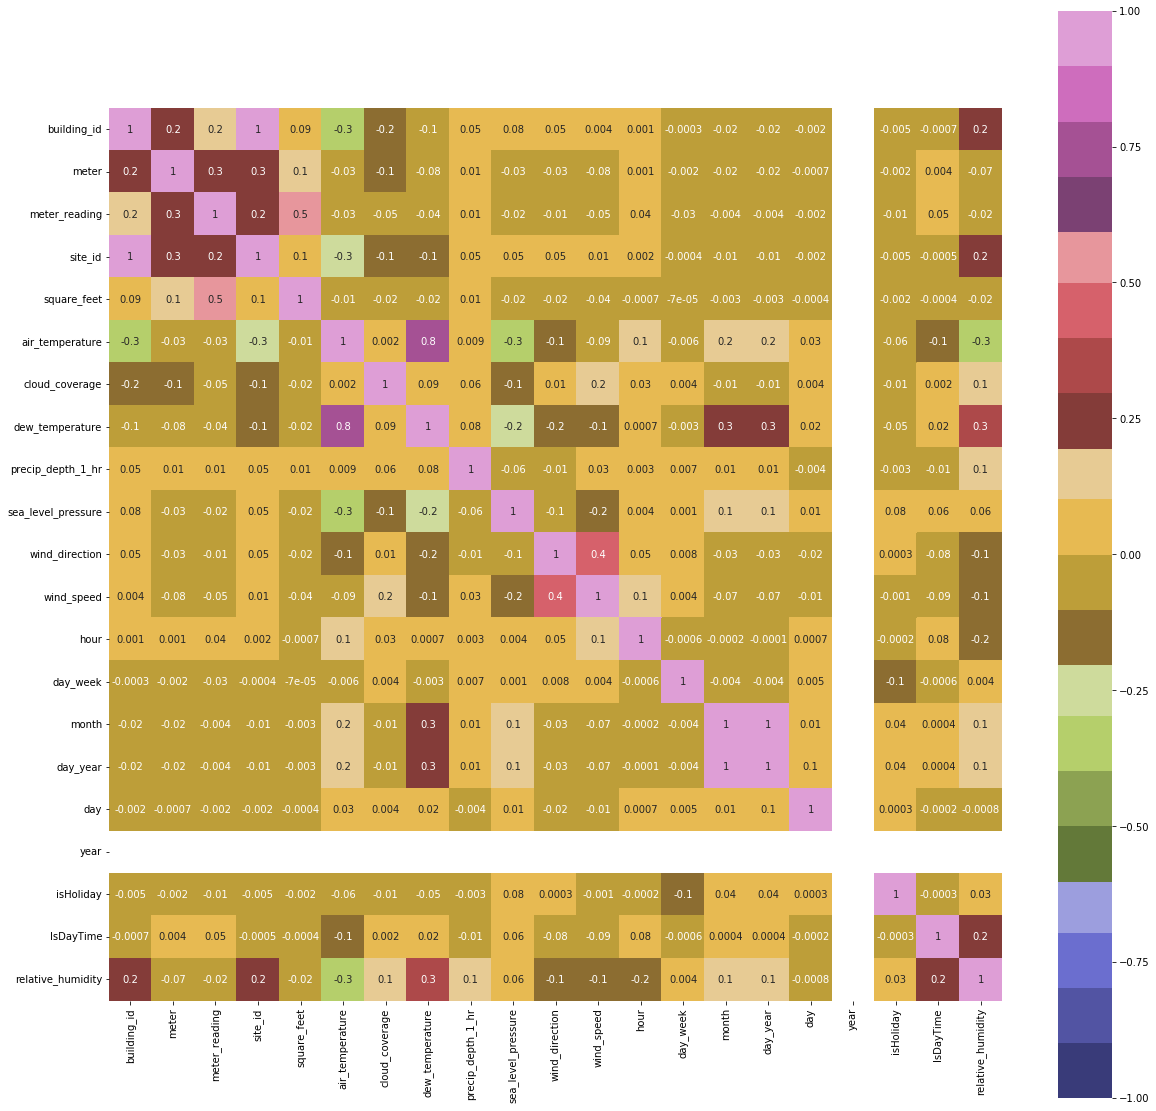

In [33]:
plt.figure(figsize=(20,20))
corr = df_train.corr()
sns.heatmap(df_train.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, square=True, cmap='tab20b')
corr["meter_reading"].apply(abs).sort_values(ascending=False)

In [34]:
print(df_train.head())
print(df_test.head())

   building_id  meter  timestamp  meter_reading  site_id primary_use  \
0           46      0 2016-01-01       2.809677        0      Retail   
1           74      0 2016-01-01       2.610340        0     Parking   
2           93      0 2016-01-01       2.795113        0      Office   
3          105      0 2016-01-01       3.190624        1   Education   
4          106      0 2016-01-01       0.318163        1   Education   

   square_feet  air_temperature  cloud_coverage  dew_temperature  ...  hour  \
0         9045             25.0             6.0             20.0  ...     0   
1       387638             25.0             6.0             20.0  ...     0   
2        33370             25.0             6.0             20.0  ...     0   
3        50623              3.8             0.0              2.4  ...     0   
4         5374              3.8             0.0              2.4  ...     0   

   day_week  month  day_year  day  year  isHoliday  season  IsDayTime  \
0         4      1 

### Train Test Split

In [35]:
import pandas as pd 
from sklearn.model_selection import train_test_split

rawData_x = df_train.drop("meter_reading",axis="columns")
rawData_y = df_train[["meter_reading"]]

random = 51
x_train, x_test, y_train, y_test = train_test_split(rawData_x, rawData_y, test_size=0.2,random_state=random)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

x_train.drop(['timestamp'], axis=1,inplace=True)
x_test.drop(['timestamp'], axis=1,inplace=True)

### Transforming Categorical features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector as selector


categorical_features = [
    'primary_use',
    'meter',
    'site_id',
    'building_id',
    'day_week',
    'day_year',
    'month',
    'day',
    'year',
    'season',
    ]
numeric_features = list(set(x_train.columns.tolist()).difference(set(categorical_features)))

onehotPreprocessor = ColumnTransformer(
[
    ("categoricals", OneHotEncoder(handle_unknown = "ignore"), categorical_features),
    ("numericals",StandardScaler(),numeric_features)
    
],
remainder = "passthrough"
)
x_train = onehotPreprocessor.fit_transform(x_train)
x_test = onehotPreprocessor.fit_transform(x_test)

## Task - 3
### Implementation + Results

### LinearRegression:


In [ ]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

In [ ]:
#Performing a cross validation techniques of 3-fold 

from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(lr,x_train,y_train,cv = 3)

print(cv_results)

In [ ]:
#Checking the mean accuracy of the resulting three  models

print(np.mean(cv_results))

### Ridge Regression:


In [ ]:

from sklearn.linear_model import Ridge

parameters = {'alpha':[0.001,0.01,0.1,1,10,100,1000,10000],
              'fit_intercept' : [True],
              'solver' : ['lsqr']}

ridge = GridSearchCV(estimator = Ridge(),
                        param_grid = parameters,
                        cv = 3, 
                        scoring = 'neg_mean_squared_error',
                        verbose = 10,
                        return_train_score = True,
                        n_jobs = -1)

ridge.fit(x_train, y_train)

#Bestparam is 1000

### CatBoost Regressor:


In [ ]:

# !pip install CatBoostRegressor

from catboost import CatBoostRegressor

cb = CatBoostRegressor()

params={'n_estimators':[500,1000,1500,2000],
        'max _depth':[7,9,11,13]}

cb_clf= RandomizedSearchCV(cb,params,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=3,verbose=15,n_iter=5,random_state=51)

cb_clf.fit(x_train,y_train)

cb_clf.score(x_test, y_test)

### Random Forest Regressor:


In [ ]:

from sklearn. ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

rf= RandomForestRegressor(n_jobs=-1)
params={'n_estimators':[60,80,100],
        'max_depth':[5,7,9]}

rf_clf=RandomizedSearchCV(rf,params,scoring='neg_root_mean_squared_error',n_jobs=8,cv=3,verbose=15,n_iter=5,random_state=51)

rf_clf.fit(x_train,y_train)

rf_clf.score(x_test,y_test)



### Neural Network (LSTM):

In [ ]:
import tensorflow
from sklearn import preprocessing
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,Adam
from keras import regularizers


btw_encoded = df_train[:]


BTW_test_encoded = df_test[:]

#Using Encoding technique

# label encoding  

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
btw_encoded["primary_use"] = le.fit_transform(btw_encoded["primary_use"])

btw_encoded["meter"] = le.fit_transform(btw_encoded['meter'])

btw_encoded["site_id"] = le.fit_transform(btw_encoded['site_id'])

btw_encoded["building_id"] = le.fit_transform(btw_encoded['building_id'])

btw_encoded["day_week"] = le.fit_transform(btw_encoded['day_week'])

btw_encoded["day_year"] = le.fit_transform(btw_encoded['day_year'])

btw_encoded["month"] = le.fit_transform(btw_encoded['month'])

btw_encoded["day"] = le.fit_transform(btw_encoded['day'])

btw_encoded["year"] = le.fit_transform(btw_encoded['year'])

#btw_encoded["season"] = le.fit_transform(btw_encoded['season'])
   
BTW_test_encoded["primary_use"] = le.fit_transform(BTW_test_encoded["primary_use"])

BTW_test_encoded["meter"] = le.fit_transform(BTW_test_encoded['meter'])

BTW_test_encoded["site_id"] = le.fit_transform(BTW_test_encoded['site_id'])

BTW_test_encoded["building_id"] = le.fit_transform(BTW_test_encoded['building_id'])

BTW_test_encoded["day_week"] = le.fit_transform(BTW_test_encoded['day_week'])

BTW_test_encoded["day_year"] = le.fit_transform(BTW_test_encoded['day_year'])

BTW_test_encoded["month"] = le.fit_transform(BTW_test_encoded['month'])

BTW_test_encoded["day"] = le.fit_transform(BTW_test_encoded['day'])

BTW_test_encoded["year"] = le.fit_transform(BTW_test_encoded['year'])



In [ ]:
#Checking the columns in the train 

btw_encoded.columns

In [ ]:
#Redistributing the features to the labels

X = btw_encoded[['building_id', 'meter', 'site_id',
       'primary_use', 'square_feet', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'hour', 'day_week', 'month', 'day_year',
       'day', 'year']]
       
y = btw_encoded['meter_reading']

In [ ]:
from sklearn.model_selection import train_test_split



x_train, x_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state= 45)


#Writing a function with the corresponding embeddding layers that are required for developing a model

def make_model(input_dim=10,metrics=root_mean_squared_error,loss='mse', optimizer="rmsprop",drop_rate=0.5):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True, input_shape=(None,input_dim)))
    model.add(Dropout(drop_rate))
    model.add(BatchNormalization())
    model.add(LSTM(128,return_sequences=False))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])
    return model

#Writing a funtion to run the model

def run_model(model,x_train,y_train,epochs=50,batch_size=500,verbose=1,validation_data=(x_val,y_val),callbacks =None):
    x_train = x_train.values[:]
    x_train= x_train.reshape((x_train.shape[0],1,x_train.shape[-1]))
    y_train = np.log1p(y_train)
    if validation_data != None:
        x_val = validation_data[0].values[:]
        x_val = x_val.reshape((x_val.shape[0],1,x_val.shape[-1]))
        y_val = np.log1p(validation_data[-1])
      
    return model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=verbose,validation_data=(x_val,y_val),callbacks=callbacks)

In [ ]:
#Stopping the model before actually it learns the worst case

es = EarlyStopping(monitor='val_root_mean_squared_error', min_delta=0.0001, patience=5, verbose=True, mode='auto')

model = make_model(input_dim=x_train.shape[-1],drop_rate=0.2)

In [ ]:
#Summarizing the model 

model.summary()

history = run_model(model,x_train,y_train,epochs=30,batch_size=500,verbose=1,validation_data=(x_val,y_val), callbacks =[es])

In [ ]:
#Checking the change in Loss

loss = history.history
loss.keys()

#rmse loss
rmse_loss_train = loss['root_mean_squared_error']
rmse_loss_val = loss['val_root_mean_squared_error']
epochs_stops = es.stopped_epoch +1 # epochs number from early stopping
epochs = range(1,epochs_stops + 1)  #len(loss_train)
plt.figure(figsize=(12,6))
plt.plot(epochs,rmse_loss_train,'r', label='RMSE train loss')
plt.plot(epochs,rmse_loss_val,'b',label='RMSE val loss')
plt.title(' root mean square error loss')
plt.legend()
plt.show()